In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\acre\OneDrive\Desktop\pandas\ml project 1\cs_students.csv')

## Data Understanding

In [19]:
df.head()

,Gender,Age,GPA,Interested Domain,Future Career,Python,SQL,Java,Projects_3D Animation,Projects_3D Modeling,...,Projects_Smart Home Automation,Projects_Social Media Platform,Projects_Statistical Analysis,Projects_Usability Testing,Projects_User Experience Researcher,Projects_Virtual Reality Development,Projects_Web Application Development,Projects_iOS App,Projects_iOS App Development,Projects_iOS Game
0,1,21,3.5,0,21,Strong,Strong,Weak,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,20,3.2,10,7,Average,Strong,Weak,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,22,3.8,24,29,Strong,Strong,Average,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,21,3.7,26,32,Weak,Strong,Strong,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,23,3.4,7,18,Average,Weak,Strong,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(180, 12)

In [5]:
df.dtypes

Student ID             int64
Name                  object
Gender                object
Age                    int64
GPA                  float64
Major                 object
Interested Domain     object
Projects              object
Future Career         object
Python                object
SQL                   object
Java                  object
dtype: object

In [6]:
df.describe()

,Student ID,Age,GPA
count,180.000000,180.000000,180.000000
mean,90.500000,22.116667,3.615000
std,52.105662,2.823040,0.177341
min,1.000000,20.000000,3.200000
25%,45.750000,21.000000,3.500000
50%,90.500000,22.000000,3.600000
75%,135.250000,22.250000,3.700000
max,180.000000,37.000000,3.900000


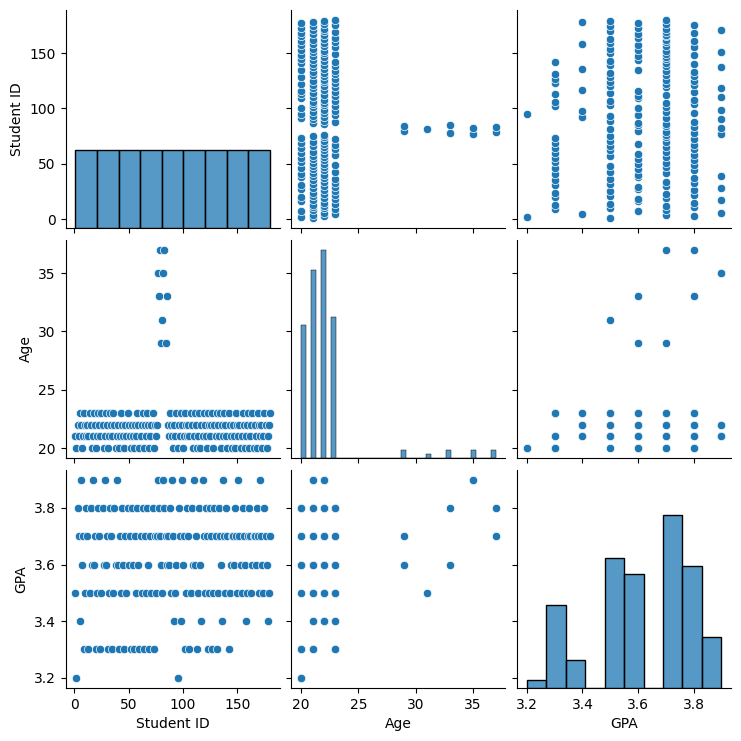

<Figure size 200x200 with 0 Axes>

In [7]:
sns.pairplot(df)
plt.figure(figsize=(2,2))
plt.show()

## Data Preprocessing

In [8]:
# drop irrelevant features
df.drop(['Student ID','Name','Major'],axis=1,inplace=True)

In [9]:
#checking null values
df.isnull().sum()

Gender               0
Age                  0
GPA                  0
Interested Domain    0
Projects             0
Future Career        0
Python               0
SQL                  0
Java                 0
dtype: int64

In [10]:
#checking there is duplicacy or not
df.duplicated().sum()

np.int64(52)

In [11]:
# drop duplicates rows
df.drop_duplicates(inplace=True)

## Encode Categorical Data Into Numerical Data

In [12]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [13]:
gender_en = LabelEncoder()
df['Gender'] = gender_en.fit_transform(df['Gender'])

In [14]:
InterestedDomain_en = LabelEncoder()
df['Interested Domain'] = InterestedDomain_en.fit_transform(df['Interested Domain'])

In [15]:
ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
evalues = ohe.fit_transform(df[['Projects']])

edf = pd.DataFrame(evalues, columns = ohe.get_feature_names_out(['Projects']))
df.drop('Projects',axis=1,inplace=True)

df.reset_index(drop=True, inplace=True)
edf.reset_index(drop=True, inplace=True)

df = pd.concat([df, edf], axis=1)

In [16]:
FutureCareer_en = LabelEncoder()
df['Future Career'] = FutureCareer_en.fit_transform(df['Future Career'])

In [20]:
lang_en = OrdinalEncoder(categories=[['Weak', 'Average', 'Strong']])

## Python, SQL, Java all have same values
df['Python'] = lang_en.fit_transform(df[['Python']])
df['SQL'] = lang_en.fit_transform(df[['SQL']])
df['Java'] = lang_en.fit_transform(df[['Java']])

## Model Training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [22]:
# seprating indipendent and dependent variable
x = df.drop('Future Career', axis=1)
y = df['Future Career']

In [23]:
# spliting data into training and testing data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

In [24]:
dt = DecisionTreeClassifier(max_depth=60)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=60)

## Model Evaluation

In [25]:
from sklearn.metrics import f1_score

In [26]:
# accuracy score of a model
dt.score(xtest, ytest)

0.8846153846153846

In [27]:
# f1 score of a model
f1_score(ytest, dt.predict(xtest), average = 'macro')

0.7571428571428572

## Saving All Models

In [28]:
#import joblib

In [29]:
#joblib.dump(gender_en,'gender_en.pkl')

['gender_en.pkl']

In [30]:
#joblib.dump(InterestedDomain_en,'InterestedDomain_en.pkl')

['InterestedDomain_en.pkl']

In [31]:
#joblib.dump(ohe,'Projects_en.pkl')

['Projects_en.pkl']

In [32]:
#joblib.dump(FutureCareer_en,'FutureCareer_en.pkl')

['FutureCareer_en.pkl']

In [34]:
#joblib.dump(lang_en,'lang_en.pkl')

['lang_en.pkl']

In [35]:
#joblib.dump(dt,'output_model.pkl')

['output_model.pkl']